## Stats701-001 Homework 7: `pandas`
### Taylor Spooner
#### spoonert@umich.edu

**Collaboration**:

**Time**: 

## Problem 1: Warmup: constructing `pandas` objects

#### 1. Create a `pandas` Series object with indices given by the first 10 letters of the English alphabet and values given by the first 10 primes.

In [2]:
import pandas as pd
import numpy as np
idx = list('abcdefghij')
vals = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
s = pd.Series(vals, index=idx)
s

a     2
b     3
c     5
d     7
e    11
f    13
g    17
h    19
i    23
j    29
dtype: int64

In [3]:
type(s)

pandas.core.series.Series

#### 2. Recreate the table given in the homework assignment.

In [4]:
tups = list(zip(*[['goat','goat', 'goat', 'goat', 'bird', 'bird', 'bird', 'bird', 'llama', 'llama', 'llama', 'llama'],
        ['A', 'A', 'a', 'a', 'A', 'A','a', 'a', 'A', 'A', 'a', 'a'],
        ['A', 'a', 'A', 'a', 'A', 'a', 'A', 'a', 'A', 'a', 'A', 'a']]))
idx = pd.MultiIndex.from_tuples(tups, names=['animal', 'parent1', 'parent2'])


In [38]:
df = pd.DataFrame({'score1': [1,2,3,4,5,6,7,8,9,10,11,12], 
                   'score2': [2,4,4,6,6,8,8,10,10,12,12,14]}, index=idx)
df

score1  score2
animal parent1 parent2                
goat   A       A             1       2
               a             2       4
       a       A             3       4
               a             4       6
bird   A       A             5       6
               a             6       8
       a       A             7       8
               a             8      10
llama  A       A             9      10
               a            10      12
       a       A            11      12
               a            12      14

### Problem 2: Working with `pandas` DataFrames  
For this problem, you’ll need to download the celebrated iris data set.

#### 1. Read `iris.csv` into Python as a `pandas` DataFrame. Note that the CSV file includes column headers. 
- **How many data points are there in this data set?**
- **What are the data types of the columns? What are the column names?**
- **The column names correspond to flower species names, as well as four basic measurements one can make of a flower: the width and length of its petals and the width and length of its sepal (the part of the pant that supports and protects the flower itself).**
- **How many species of flower are included in the data?**


In [5]:
df = pd.read_csv('iris.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**How many data points are there in this data set?**

In [6]:
df.shape[0]

150

There are 150 data points in this data set.

**What are the type of the columns? What are the column names?**

In [7]:
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

There are 5 columns in this data set. `Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width` are all of type float64. `Species` is of type object.

**How many species of flower are included in the data?**

In [8]:
df.groupby('Species').groups

{'setosa': Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
            dtype='int64'),
 'versicolor': Int64Index([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
             67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
             84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
            dtype='int64'),
 'virginica': Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
             113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
             126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
             139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
            dtype='int64')}

We see that there are three species of flowers included.

#### 2. The data that I uploaded to my website, which you have downloaded, is based on the data initially uploaded to the UC Irvine machine learning repository. It is now known that this data contains errors in two of its rows. Using 1-indexing, these errors are in the 35th and 38th rows. The 35th row should read 4.9,3.1,1.5,0.2,”Irissetosa”, where the fourth feature is incorrect as it appears in the file, and the 38th row should read 4.9,3.6,1.4,0.1,”Iris-setosa”, where the second and third features are incorrect as they appear in the file. Correct these entries of your DataFrame

In [9]:
df.iloc[34, 3] = 0.2

In [10]:
df.iloc[37,1] = 3.6
df.iloc[37,2] = 1.4

#### 3. The iris dataset is commonly used in machine learning as a proving ground for clustering and classification algorithms. Some researchers have found it useful to use two additional features, called *Petal ratio* and *Sepal ratio*, defined as the ratio of the petal length to petal width and the ratio of the sepal length to sepal width, respectively. Add two columns to you DataFrame corresponding to these two new features. Name these columns `Petal.Ratio` and `Sepal.Ratio`, respectively.

In [11]:
df['Petal.Ratio'] = df['Petal.Length'] / df['Petal.Width']
df['Sepal.Ratio'] = df['Sepal.Length'] / df['Sepal.Width']
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Petal.Ratio,Sepal.Ratio
0,5.1,3.5,1.4,0.2,setosa,7.0,1.457143
1,4.9,3.0,1.4,0.2,setosa,7.0,1.633333
2,4.7,3.2,1.3,0.2,setosa,6.5,1.468750
3,4.6,3.1,1.5,0.2,setosa,7.5,1.483871
4,5.0,3.6,1.4,0.2,setosa,7.0,1.388889


#### 4. Save your corrected and extended iris DataFrame to a csv file called `iris_corrected.csv`.

In [12]:
df.to_csv('iris_corrected.csv')

#### 5. Use a `pandas` aggregate operation to determine the mean, median, minimum, maximum and standard deviation of the petal and sepal ratio for each of the three species in the data set. 

In [13]:
df.iloc[:,4:7].groupby('Species').agg([np.median, np.mean, np.min, np.max, np.std])

Petal.Ratio                                     Sepal.Ratio  \
                median      mean      amin  amax       std      median   
Species                                                                  
setosa        7.000000  6.908000  2.666667  15.0  2.854545    1.463063   
versicolor    3.240385  3.242837  2.666667   4.1  0.312456    2.161290   
virginica     2.666667  2.780662  2.125000   4.0  0.407367    2.169540   

                                                    
                mean      amin      amax       std  
Species                                             
setosa      1.470188  1.268293  1.956522  0.118750  
versicolor  2.160402  1.764706  2.818182  0.228658  
virginica   2.230453  1.823529  2.961538  0.246992

### Problem 3: Plotting `pandas` DataFrames

In [46]:
import matplotlib.pyplot as plt

#### 1. Use the built-in `pandas` plotting tools to make a box-and-whisker plot showing the distribution of petal ratio and sepal ratio for each of the three species. Your plot should have two subplots, one for petal ratio and one for sepal ratio. You may choose the details of your plots (i.e., how to handle outliers, displaying mean vs median, etc) however you think is best. Please include labels on your x- and y-axes and give an appropriate title to your plot.

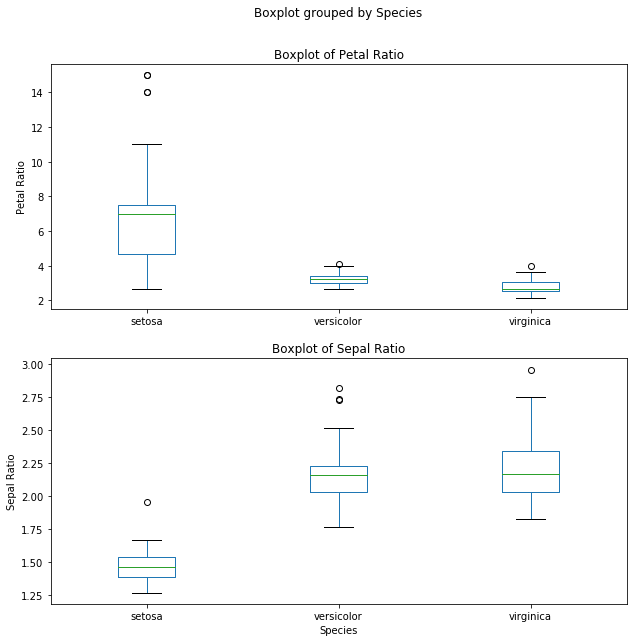

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
df.boxplot(by='Species', column='Petal.Ratio', grid=False, ax=axes[0]) 
axes[0].set_title('Boxplot of Petal Ratio')
axes[0].set_ylabel('Petal Ratio')
axes[0].set_xlabel('')
df.boxplot(by='Species', column='Sepal.Ratio', grid=False, ax=axes[1])
axes[1].set_title('Boxplot of Sepal Ratio')
axes[1].set_ylabel('Sepal Ratio')
plt.show()

#### 2. Use the built-in `pandas` plotting tools to make a scatter matrix plot for the four original features (petal width, petal length, sepal width and sepal length). Each point in the scatter plot should be colored according to its species.

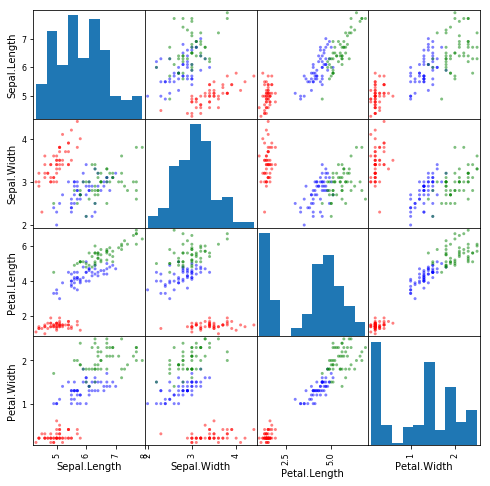

In [174]:
from pandas.plotting import scatter_matrix

# Define the color map we want
colMap={'setosa':'red', 'versicolor':'blue', 'virginica':'green'}
#  Get the color value for each value of the Species
colors = list(map(lambda x:colMap.get(x), df['Species']))
# Plot the 4 original columns, colored by class
scatter_matrix(df[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']],
              figsize=(8,8), c=colors)

plt.show()